##**Perkenalan**

Penggunaan kartu kredit telah menjadi metode pembayaran yang umum digunakan di era digital saat ini. Bagi perusahaan kartu kredit dan lembaga keuangan, memahami pola penggunaan kartu kredit oleh pelanggan mereka sangat penting. Itu membantu mereka dalam mengidentifikasi kebiasaan pengeluaran, perilaku pembayaran, dan pola penggunaan yang dapat membantu mereka dalam mengambil keputusan bisnis yang lebih baik. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan.

Pada Final Project 4 ini, kami dari tim 2 kelas PYTN-013 yang beranggotakan Aristania, Arnonce dan Desi akan menganalisis dan memvisualisasikan data untuk mengelompokkan dan memprediksi saldo pembayaran Kartu kredit dengan menggunakan algoritma Kmeans dan DBSCAN.

##**Import Library yang digunakan**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 500)

## **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Memuat data menggunakan gdrive
path = "/content/drive/MyDrive/CC GENERAL.csv"
df = pd.read_csv(path)

In [ ]:
# Menampilkan 5 baris teratas dari data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Ekplorasi sederhana

In [ ]:
# Kolom/feature dataframe
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
# Ukuran dataframe
df.shape

(8950, 18)

In [ ]:
# Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## **Data Cleaning**

In [ ]:
# Mengubah nama kolom menjadi huruf kecil
df.rename(lambda x: x.lower().replace(' ', '_'), axis = 1, inplace = True)

In [ ]:
# memeriksa missing values
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [ ]:
# Mengisi missing values (NaN) pada kolom credit_limit dengan median
df['credit_limit'] = df['credit_limit'].fillna(df['credit_limit'].median())

In [ ]:
# Mengisi missing values (NaN) pada kolom minimum_payments dengan median
df['minimum_payments'] = df['minimum_payments'].fillna(df['minimum_payments'].median())

In [ ]:
# Drop kolom cust_id karena merupakan id unik dari setiap pelanggan
df.drop('cust_id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

##**Explorasi Data**

In [ ]:
# Deskriptif Statistik
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Visualisasi Data**

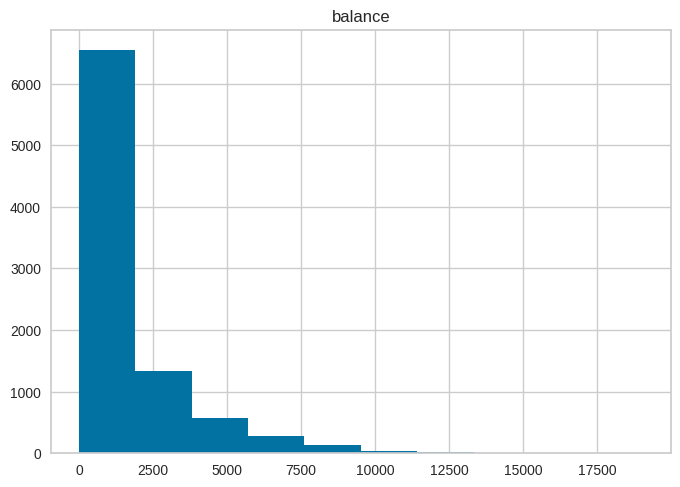

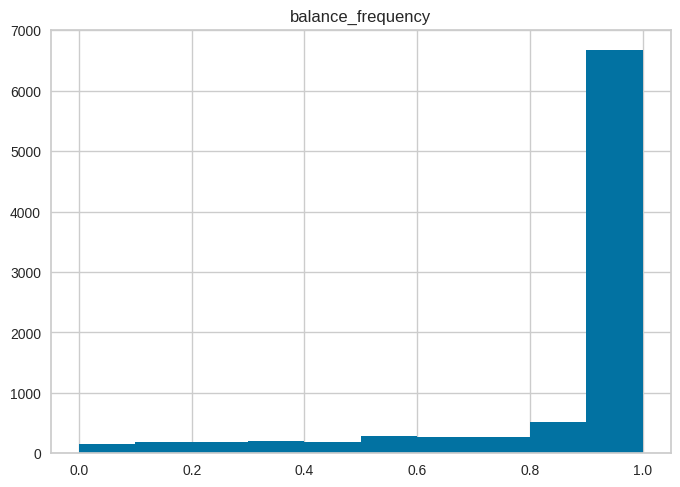

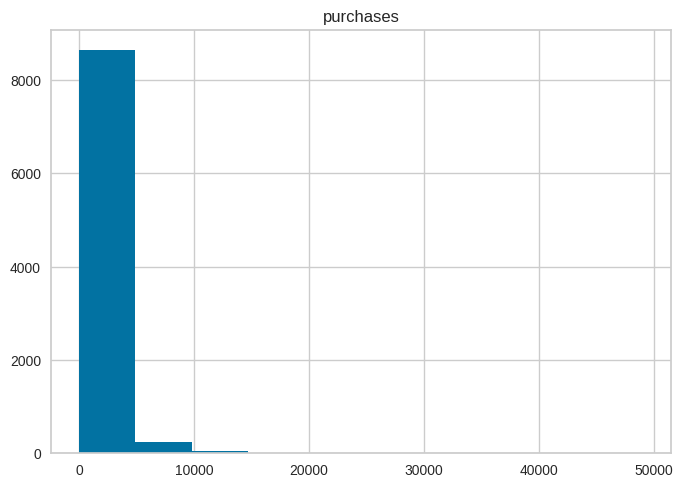

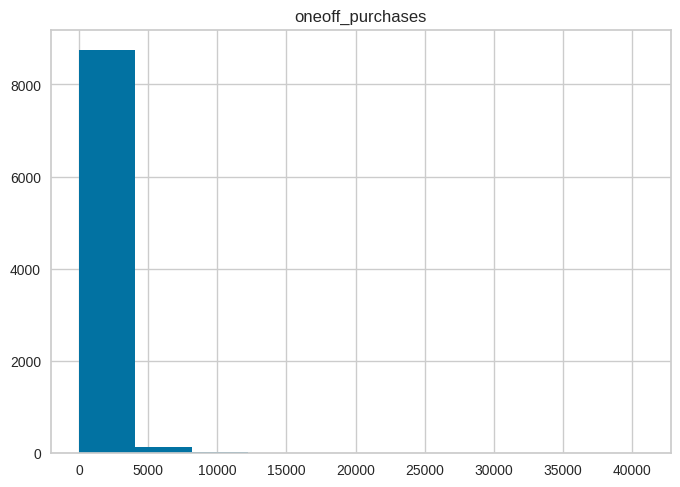

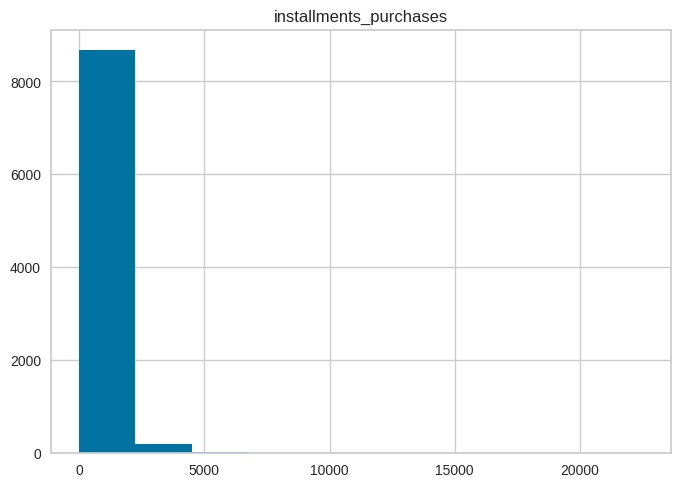

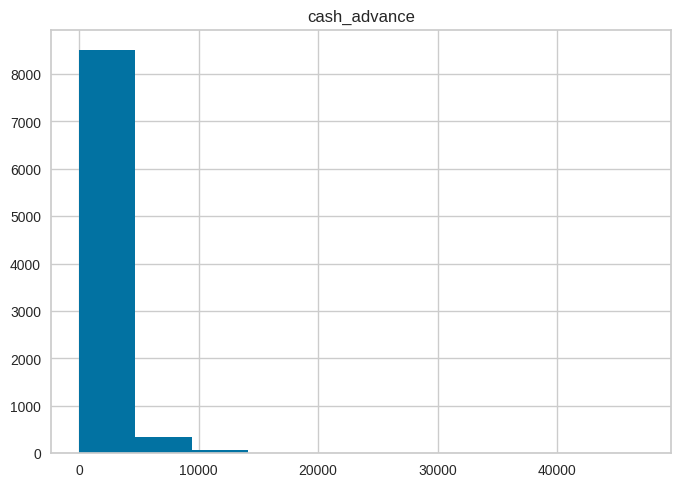

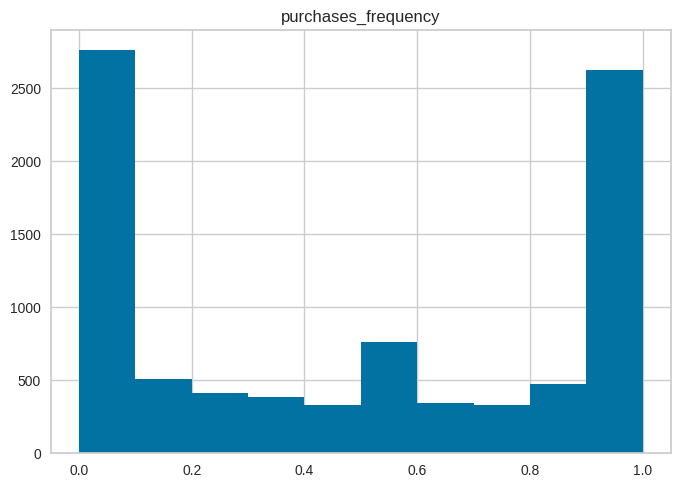

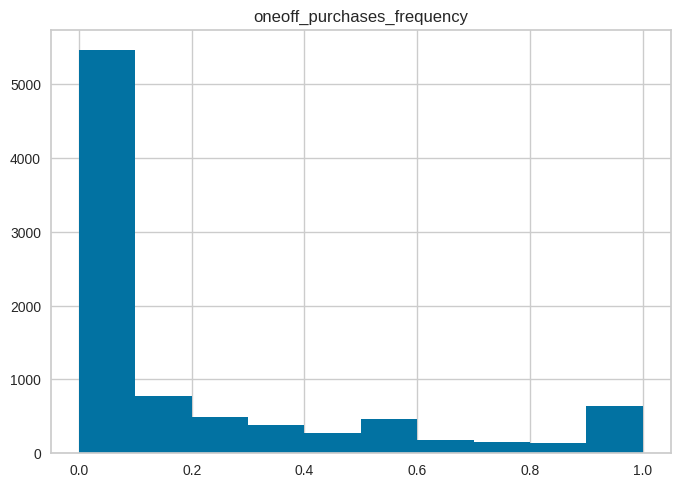

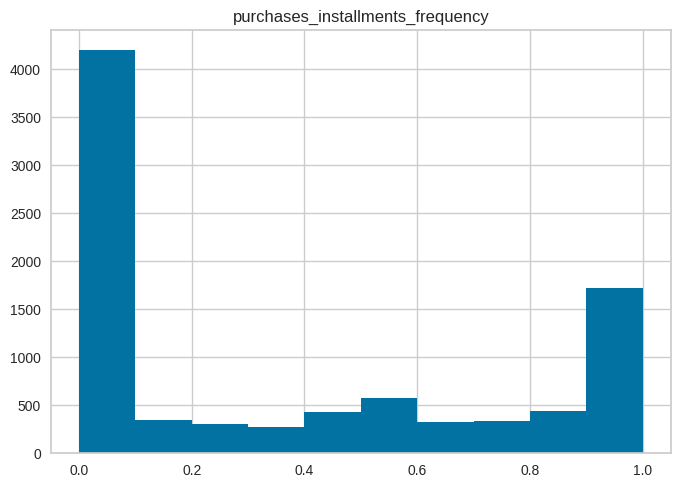

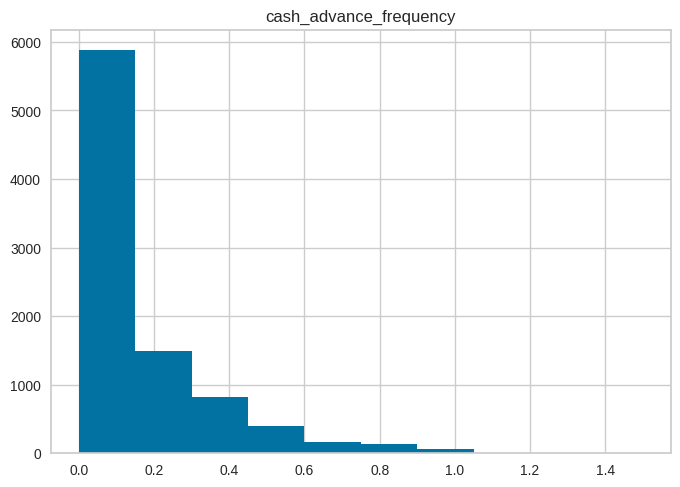

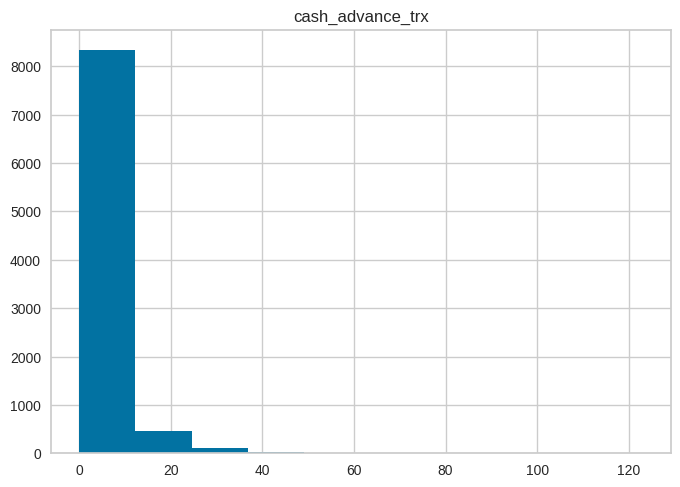

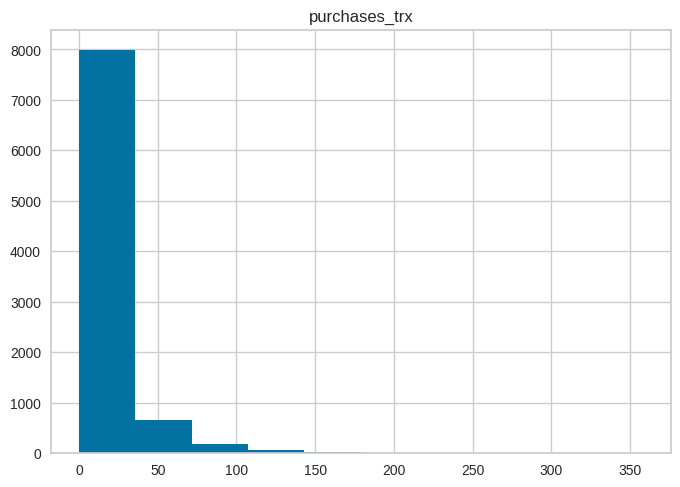

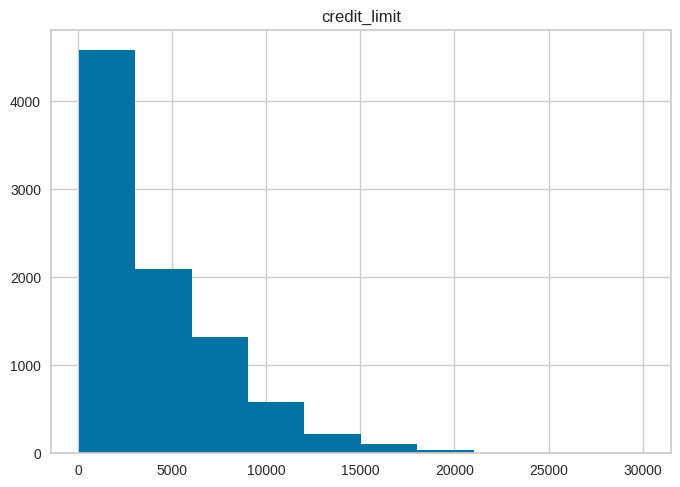

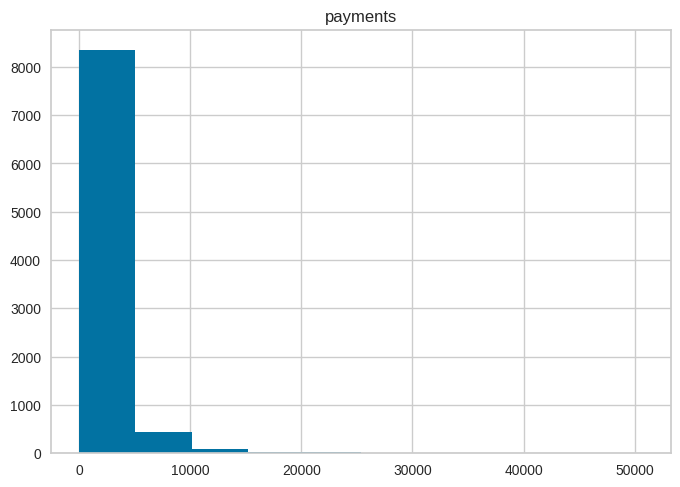

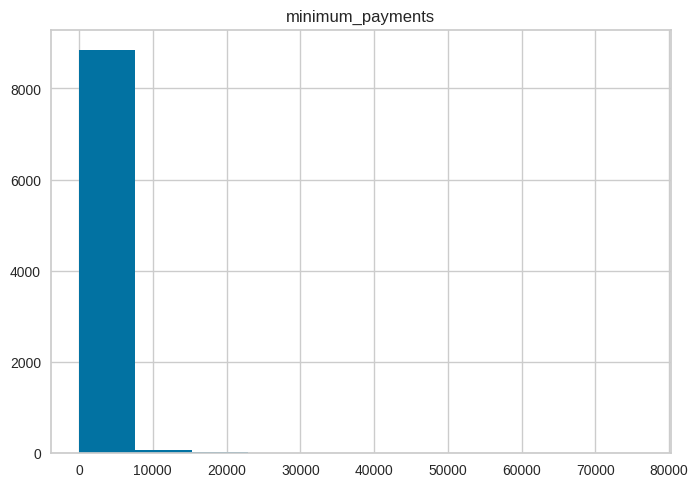

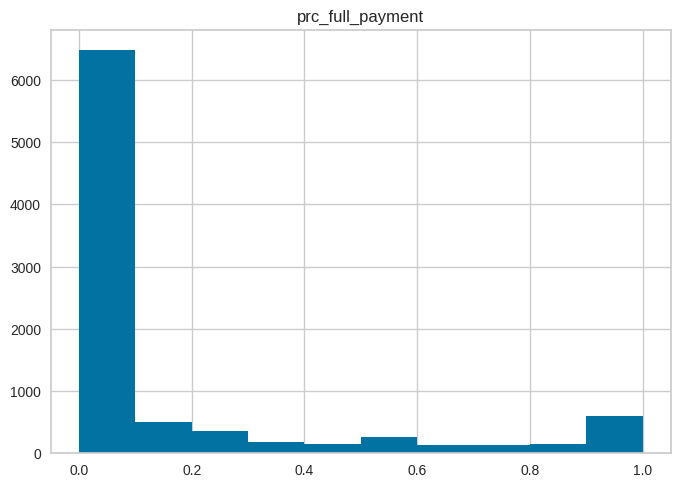

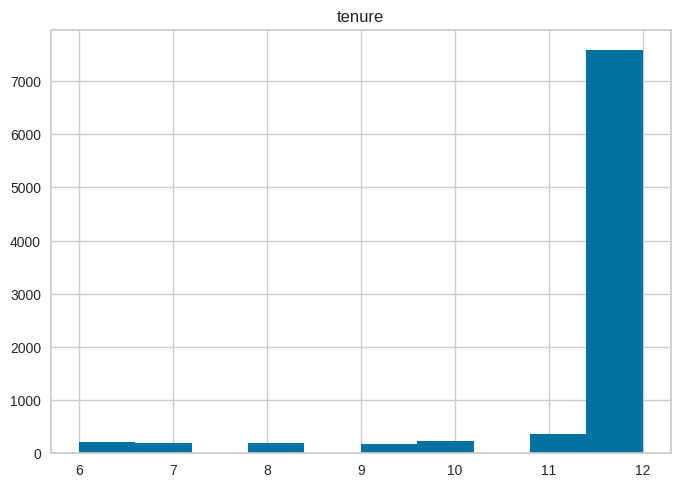

In [ ]:
# Menampilkan distribusi frekuensi dari masing-masing fitur
cols = df.columns
for column in cols:
  df.hist(column=column)

Kemencengan/ketidaksimetrisan pada sebaran data menunjukkan bahwa hanya sejumlah kecil pelanggan yang melakukan pembelian dalam jumlah yang besar, sementara sebagian besar pelanggan melakukan pembelian dalam jumlah yang lebih kecil.

##**Data Preprocessing**

In [ ]:
# Memeriksa info detail untuk setiap fitur
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates().values
    sample_values = list(unique_values[:2]) if len(unique_values) >= 2 else list(unique_values)
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum() / len(df[col])) * 100, 2),
                    df[col].nunique(), sample_values])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missing value', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
print(dfDesc)

                        dataFeatures dataType  missing value  nullPct  unique  \
0                            balance  float64              0      0.0    8871   
1                  balance_frequency  float64              0      0.0      43   
2                          purchases  float64              0      0.0    6203   
3                   oneoff_purchases  float64              0      0.0    4014   
4             installments_purchases  float64              0      0.0    4452   
5                       cash_advance  float64              0      0.0    4323   
6                purchases_frequency  float64              0      0.0      47   
7         oneoff_purchases_frequency  float64              0      0.0      47   
8   purchases_installments_frequency  float64              0      0.0      47   
9             cash_advance_frequency  float64              0      0.0      54   
10                  cash_advance_trx    int64              0      0.0      65   
11                     purch

**Analisis :**

*   Tipe Data: Semua fitur (kolom) dalam dataset ini memiliki tipe data float64, yang menunjukkan bahwa semua nilai dalam fitur-fitur tersebut adalah bilangan desimal.
*   Missing Value: Tidak ada missing value dalam dataset ini. Setiap fitur memiliki jumlah nilai yang sama dengan jumlah baris dalam dataset (tidak ada nilai yang hilang).
*   Persentase Missing Value: Persentase missing value untuk semua fitur adalah 0%, artinya tidak ada nilai yang hilang dalam dataset ini.
*   Unique Values: Setiap fitur memiliki jumlah nilai unik yang berbeda-beda. Jumlah nilai unik tersebut dapat bervariasi dari fitur ke fitur, mulai dari 13 nilai unik untuk fitur BALANCE_FREQUENCY hingga 8715 nilai unik untuk fitur MINIMUM_PAYMENTS. Hal ini menunjukkan variasi dalam distribusi nilai pada setiap fitur.
*   Contoh Nilai Unik: Untuk setiap fitur, diberikan contoh dua nilai unik yang ada dalam dataset. Misalnya, pada fitur BALANCE, contoh dua nilai unik adalah [3.735303702663308, 8.07198906965229].

**VIF**

Variation Inflation Factor untuk mengukur sejauh mana variabel dalam model regresi bergantung pada variabel lainnya dengan mengidentifikasi tingkat multikolinieritas.

In [ ]:
# Membuat salinan dataset dan memasukannya ke variabel baru
df2 = df.copy()

In [ ]:
# Menghapus kolom tenure
df2.drop(['tenure'], axis=1, inplace=True)

In [ ]:
# Menghitung VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [ ]:
# Menghitung Variance Inflation Factor (VIF) pada Data df2
out = df2.iloc[:,[0,2,3,4,5,10,11,12,13,14,15]]
calc_vif(out)

,variables,VIF
1,purchases,58724.912603
2,oneoff_purchases,32752.414904
3,installments_purchases,10390.924728
0,balance,3.653401
8,payments,3.500616
7,credit_limit,3.387756
4,cash_advance,3.334600
6,purchases_trx,2.804015
5,cash_advance_trx,2.142081
10,prc_full_payment,1.475239


*VIF digunakan untuk melihat nilai multikonearitas yang besar*

**Analisis:**

*   Terdapat beberapa variabel yang menunjukkan adanya multicollinearity (keterkaitan tinggi antara variabel):
    *   Variabel MINIMUM_PAYMENTS memiliki VIF tertinggi dengan nilai 70.914, diikuti oleh PAYMENTS dengan VIF 57.801 dan CREDIT_LIMIT dengan VIF 53.103. Hal ini menunjukkan adanya keterkaitan tinggi antara variabel-variabel tersebut.
    *   Variabel BALANCE juga menunjukkan keterkaitan yang tinggi dengan VIF sebesar 46.205.
*   Variabel PURCHASES_TRX, CASH_ADVANCE, CASH_ADVANCE_TRX, INSTALLMENTS_PURCHASES, PURCHASES, ONEOFF_PURCHASES, dan PRC_FULL_PAYMENT memiliki nilai VIF yang lebih rendah dibandingkan variabel-variabel sebelumnya. Ini menunjukkan tingkat keterkaitan yang lebih rendah antara variabel-variabel ini.

In [ ]:
# Check skewness pada dataset
for i in out.columns:
    print(i, ': ', out[i].skew())

balance :  2.393386042571806
purchases :  8.144269064554651
oneoff_purchases :  10.045082884700278
installments_purchases :  7.299119908745641
cash_advance :  5.166609074074723
cash_advance_trx :  5.721298203192298
purchases_trx :  4.630655265932403
credit_limit :  1.5226359501884323
payments :  5.907619794397562
minimum_payments :  13.852446498665346
prc_full_payment :  1.942819940971858


Dari hasil check skewness yang diberikan, dapat dilihat bahwa beberapa variabel memiliki skewness yang signifikan. Skewness mengukur tingkat asimetri distribusi data. Skewness positif menunjukkan bahwa ekor distribusi cenderung ke kanan, sedangkan skewness negatif menunjukkan bahwa ekor distribusi cenderung ke kiri.

In [ ]:
!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Menangani outlier dengan metode IQR
wins = Winsorizer(capping_method='iqr', fold=3, tail='both')
out_wins = wins.fit_transform(out)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Deteksi dan Penanganan Outlier dengan Metode IQR pada DataFrame
for i in out_wins:
    Q1 = out_wins[i].quantile(0.25)
    Q3 = out_wins[i].quantile(0.75)
    IQR = Q3-Q1
    upper_quartile = Q3 + 1.5*IQR
    lower_quartile = Q1 - 1.5*IQR

    if out_wins[(out_wins[i] > upper_quartile) | (out_wins[i] < lower_quartile)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

balance yes
purchases yes
oneoff_purchases yes
installments_purchases yes
cash_advance yes
cash_advance_trx yes
purchases_trx yes
credit_limit yes
payments yes
minimum_payments yes
prc_full_payment yes


data memiliki outlier berdasarkan batasan yang ditentukan menggunakan metode IQR

**Feature Scalling**

In [ ]:
# Scaling
scaler = RobustScaler()
out_scaler = pd.DataFrame(scaler.fit_transform(out_wins))
out_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.432267,-0.248371,-0.065812,0.013657,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.279732,0.000000
1,1.209374,-0.337489,-0.065812,-0.189912,4.000000,1.00,-0.4375,0.816327,2.138626,1.230054,1.555556
2,0.842099,0.384766,1.273231,-0.189912,0.000000,0.00,0.3125,0.918367,-0.154715,0.509732,0.000000
3,0.411913,1.062798,2.530286,-0.189912,0.184759,0.25,-0.3750,0.918367,-0.564547,0.000000,0.000000
4,-0.028907,-0.322542,-0.038102,-0.189912,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.109334,0.000000


**PCA**

In [ ]:
# Fit PCA
pca = PCA(random_state=0)
pca.fit(out_scaler)

PCA(random_state=0)

In [ ]:
# Menentukan Jumlah Komponen PCA yang Mencapai Kumulatif Varians 95%
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
# Menghitung Kumulatif Varians pada PCA
np.cumsum(pca.explained_variance_ratio_)

array([0.32356237, 0.61509061, 0.74303668, 0.81869189, 0.87747074,
       0.91879783, 0.94951646, 0.96878617, 0.9868604 , 0.99738702,
       1.        ])

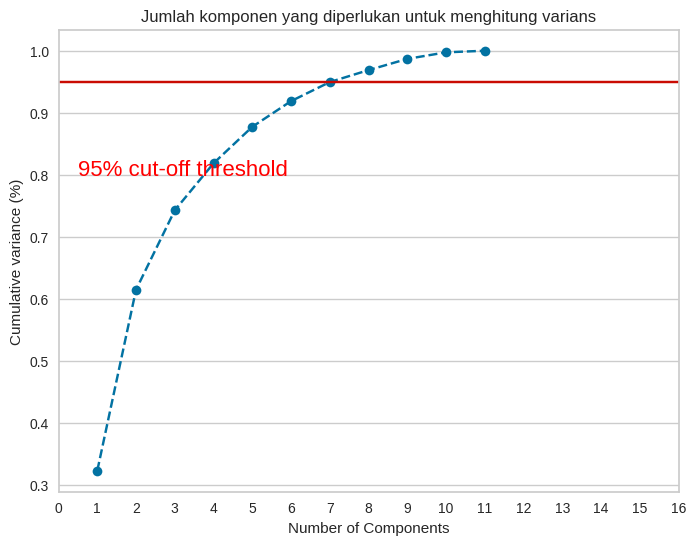

In [ ]:
# Visualisasi Kumulatif Varians pada PCA
plt.rcParams["figure.figsize"] = (8,6)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 17, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Jumlah komponen yang diperlukan untuk menghitung varians')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.80, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

In [ ]:
# Reduksi komponen menggunakan PCA
pca_final = PCA(n_components=7)
pca_final.fit(out_scaler)
X_pca = pca_final.transform(out_scaler)

In [ ]:
print('Shape sebelum reduksi komponen ', out_scaler.shape)
print('---')
print('Shape setelah reduksi komponen ', X_pca.shape)
print('Jumlah komponen setelah reduksi ', pca_final.n_components_)
print('Variansi yang dapat dijelaskan ', round((np.sum(pca_final.explained_variance_ratio_)*100),2))

Shape sebelum reduksi komponen  (8950, 11)
---
Shape setelah reduksi komponen  (8950, 7)
Jumlah komponen setelah reduksi  7
Variansi yang dapat dijelaskan  94.95


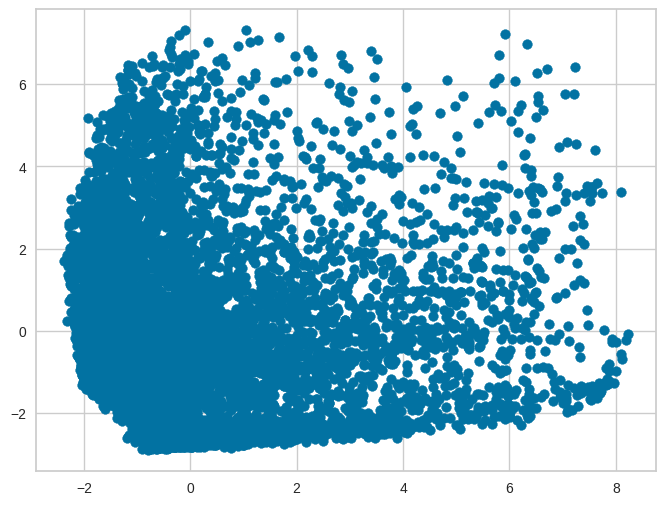

In [ ]:
# Visualisasi Scatter Plot dengan Komponen PCA
plt.scatter(X_pca[:,0], X_pca[:,1])

dapat dilihat persebaran data dari -2 hingga 8

##**Pendefinisian Model**

**Clustering**

Clustering adalah metode unsupervised learning (tidak terstruktur) yang bertujuan untuk melakukan pengelompokkan data berdasarkan kemiripan jarak antar data, clustering juga mengelompokkan objek sedemikian rupa sehingga objek dalam kluster yang sama lebih mirip satu sama laian daripada objek di kluster lain.

**1. K-Means**

K-Means merupakan algoritma unsupervised learning yang dipakai untuk mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda. K-Means adalah centroid-based algorithm, dimana kita menghitung jarak untuk menetapkan titik ke sebuah kluster. Tujuan utama disini adalah meminimalkan jarak antara titik-titik dalam sebuah kluster.

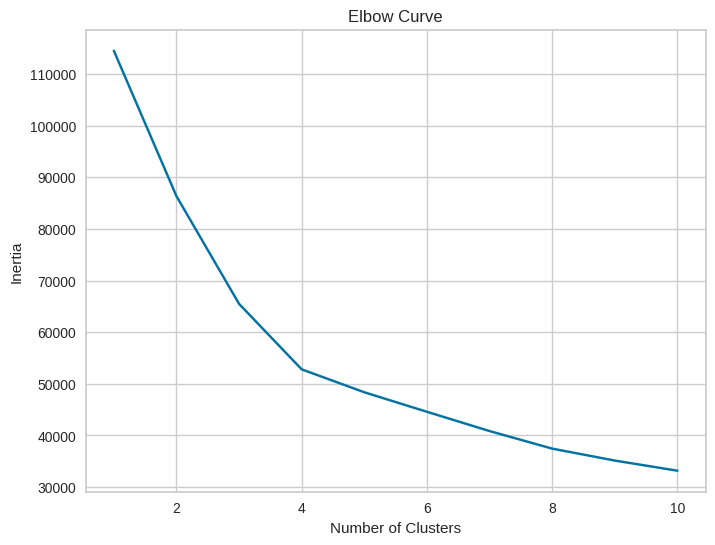

In [ ]:
# Menentukan jumlah cluster optimal dengan elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(visible=True, zorder=1)
plt.show()

Berdasarkan hasil dari elbow method menunjukkan n cluster optimal berada di angka 4.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

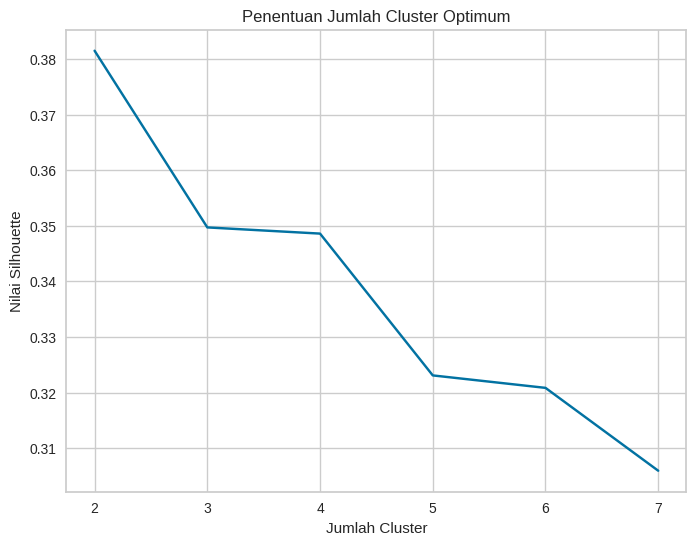

In [ ]:
# Menginisialisasi nilai K-means dengan jumlah cluster yang berbeda
clusters = range(2, 8)
silhouette_scores = []

# Melakukan K-means pada setiap nilai cluster dan menghitung nilai silhouette
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Menampilkan plot nilai silhouette
plt.plot(clusters, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Nilai Silhouette')
plt.title('Penentuan Jumlah Cluster Optimum')
plt.show()

Dari hasil visualisasi di atas menunjukkan n cluster optimum = 3

**2. DBSCAN Clustering**

DBScan (Density-Based Spatial Clustering of Applications with Noise) Clustering adalah metode clustering yang berbasis kepadatan (density-based) dari posisi data yang diamati dengan prinsip mengelompokkan data yang relatif berdekatan. Metode ini menganggap cluster sebagai suatu area yang berisi objek-objek yang padat, yang dipisahkan oleh area yang memiliki kepadatan rendah (merepresentasikan noise).

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=5)

##**Pelatihan Model**

**1. K-Means**

In [ ]:
# Menginisialisasi algoritma K-Means dengan n cluster optimal = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300)

In [ ]:
# Melatih KMeans pada data X_pca
kmeans.fit(X_pca)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
# Prediksi model KMeans
clusters = kmeans.fit_predict(X_pca)
clusters

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

**2. DBSCAN**

In [ ]:
# Fit DBScan model
dbscan.fit(X_pca)

DBSCAN(eps=3)

**Evaluasi Model**

In [ ]:
# Get KMeans Labels
kmeans_labels = kmeans.labels_
# Compute the silhouette scores for each algorithm
dbscan_silhouette = silhouette_score(df, dbscan.labels_).round (2)
# Print the silhouette coefficient for KMeans
print("K-means Silhouette Score:", kmeans_silhouette)

K-means Silhouette Score: 0.2


In [ ]:
# Get DBSCAN Labels
dbscan_labels = dbscan.labels_
# Compute the silhouette scores for each algorithm
dbscan_silhouette = silhouette_score(df, dbscan.labels_).round (2)
# Print the silhouette coefficient for DBSCAN
print("DBSCAN Silhouette Score:", dbscan_silhouette)

DBSCAN Silhouette Score: 0.73


Dari hasil evaluasi, dapat disimpulkan bahwa model K-means memiliki skor Silhouette sebesar 0.2, menunjukkan adanya pemisahan yang cukup baik antara kluster, meskipun terdapat beberapa objek yang mungkin terletak dekat dengan batas kluster atau memiliki ketidakpastian dalam pemisahan kluster. Sementara itu, model DBSCAN memiliki skor Silhouette sebesar 0.73, menunjukkan adanya pemisahan yang lebih baik antara kluster dengan lebih sedikit objek yang berdekatan dengan batas kluster atau memiliki ketidakpastian. Oleh karena itu, dari segi pemisahan kluster, model DBSCAN memiliki performa yang lebih baik daripada model K-means.

Koefisien siluet lebih tinggi untuk algoritma DBSCAN.

In [ ]:
# Reduksi komponen menggunakan PCA
pca_visualisasi = PCA(n_components=2)
pca_visualisasi.fit(out_scaler)
X_visualisasi = pca_visualisasi.transform(out_scaler)

In [ ]:
# Membuat dataframe PC1 dan PC2
reduced_data= pd.DataFrame(X_visualisasi, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-1.773968,-1.305340
1,-0.696088,2.629713
2,-0.216145,-0.122315
3,0.165294,-0.376286
4,-1.757663,-0.971875


In [ ]:
clusters = kmeans.fit_predict(X_pca)
clusters

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Membuat kolom baru yang bernama Clusters
reduced_data['Clusters']= clusters
reduced_data

,PC1,PC2,Clusters
0,-1.773968,-1.305340,1
1,-0.696088,2.629713,2
2,-0.216145,-0.122315,1
3,0.165294,-0.376286,1
4,-1.757663,-0.971875,1
...,...,...,...
8945,-0.555475,-2.679985,3
8946,-1.363356,-1.196144,1
8947,-1.241152,-2.029633,1
8948,-1.632658,-1.828232,1


In [ ]:
# Mengidentifikasi Uniknya Cluster dalam Data yang Telah Direduksi
reduced_data.Clusters.unique()

array([1, 2, 0, 3], dtype=int32)

Terdapat 4 cluster, yaitu kelas 0, 1, 2, dan 3.

## **Model Visualization**

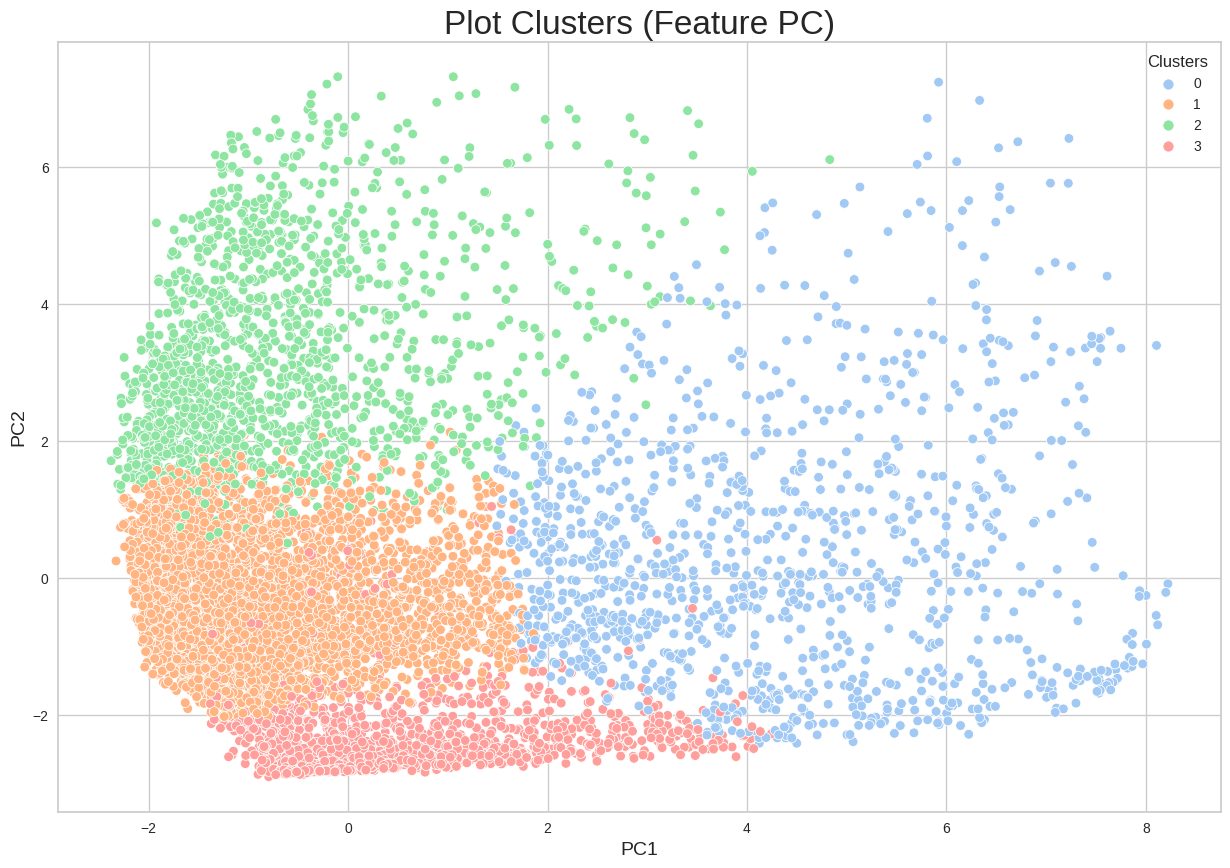

In [ ]:
# Visualisasi Plot Cluster dengan Fitur PC
plt.figure(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2', data=reduced_data, hue="Clusters",palette='pastel')
plt.title('Plot Clusters (Feature PC)',fontsize=24)
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2',fontsize=14)
plt.show()

Cluster digunakan untuk memisahkan kelompok-kelompok data yang berbeda. Berdasarkan hasil diatas, algoritma sudah baik dalam memisahkan kelompok-kelomppoknya, tetapi didalam cluster masih sedikit tercampur dengan cluster lain. Kita dapat melihat beberapa jenis cluster yang berbeda, diantaranya cluster 0, 1, 2, dan 3. Kita mungkin melihat outliers dari beberapa data tersebut.

In [ ]:
# Concat dengan cluster
df_cluster = out_scaler.copy()
df_cluster['Clusters']= clusters
df_cluster

,0,1,2,3,4,5,6,7,8,9,10,Clusters
0,-0.432267,-0.248371,-0.065812,0.013657,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.279732,0.000000,1
1,1.209374,-0.337489,-0.065812,-0.189912,4.000000,1.00,-0.4375,0.816327,2.138626,1.230054,1.555556,2
2,0.842099,0.384766,1.273231,-0.189912,0.000000,0.00,0.3125,0.918367,-0.154715,0.509732,0.000000,1
3,0.411913,1.062798,2.530286,-0.189912,0.184759,0.25,-0.3750,0.918367,-0.564547,0.000000,0.000000,1
4,-0.028907,-0.322542,-0.038102,-0.189912,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.109334,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.438709,-0.065540,-0.065812,0.431293,0.000000,0.00,-0.0625,-0.408163,-0.350037,-0.426406,3.500004,3
8946,-0.443544,-0.057245,-0.065812,0.450241,0.000000,0.00,-0.0625,-0.408163,-0.382803,0.000000,0.000000,1
8947,-0.441355,-0.202598,-0.065812,0.118215,0.000000,0.00,-0.1250,-0.408163,-0.511003,-0.372135,1.750002,1
8948,-0.446517,-0.337489,-0.065812,-0.189912,0.032823,0.50,-0.4375,-0.510204,-0.529925,-0.415288,1.750002,1


"df_cluster" merupakan hasil penggabungan antara dataset yang telah diubah menggunakan teknik skalasi dan kolom "Clusters" yang berisi hasil klasterisasi dari setiap sampel. DataFrame ini memiliki 8950 baris dan 12 kolom, di mana kolom 0 hingga 10 mewakili fitur-fitur yang telah diubah menggunakan skalasi, dan kolom "Clusters" menunjukkan klaster yang telah ditetapkan untuk setiap sampel.

In [ ]:
# Mengganti nama kolom dengan nama asli
columns_original = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX','PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
df_cluster = df_cluster.rename(columns=dict(enumerate(columns_original)))

In [ ]:
# menampilkan data frame
df_cluster

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Clusters
0,-0.432267,-0.248371,-0.065812,0.013657,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.279732,0.000000,1
1,1.209374,-0.337489,-0.065812,-0.189912,4.000000,1.00,-0.4375,0.816327,2.138626,1.230054,1.555556,2
2,0.842099,0.384766,1.273231,-0.189912,0.000000,0.00,0.3125,0.918367,-0.154715,0.509732,0.000000,1
3,0.411913,1.062798,2.530286,-0.189912,0.184759,0.25,-0.3750,0.918367,-0.564547,0.000000,0.000000,1
4,-0.028907,-0.322542,-0.038102,-0.189912,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.109334,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.438709,-0.065540,-0.065812,0.431293,0.000000,0.00,-0.0625,-0.408163,-0.350037,-0.426406,3.500004,3
8946,-0.443544,-0.057245,-0.065812,0.450241,0.000000,0.00,-0.0625,-0.408163,-0.382803,0.000000,0.000000,1
8947,-0.441355,-0.202598,-0.065812,0.118215,0.000000,0.00,-0.1250,-0.408163,-0.511003,-0.372135,1.750002,1
8948,-0.446517,-0.337489,-0.065812,-0.189912,0.032823,0.50,-0.4375,-0.510204,-0.529925,-0.415288,1.750002,1


In [ ]:
# Print Statistik Deskripsi Dasar dari setiap Cluster
pd.set_option("display.max.columns",None)
df_cluster.groupby('Clusters').describe()

BALANCE                                                              \
           count      mean       std       min       25%       50%       75%   
Clusters                                                                       
0         1175.0  0.741551  1.141000 -0.453504 -0.177574  0.332158  1.289550   
1         4882.0  0.060091  0.518932 -0.453504 -0.376670 -0.037274  0.295657   
2         1511.0  1.580469  1.162676 -0.434303  0.576620  1.408865  2.473984   
3         1382.0 -0.403591  0.068022 -0.453499 -0.440169 -0.423490 -0.389874   

                   PURCHASES                                          \
               max     count      mean       std       min       25%   
Clusters                                                               
0         3.613106    1175.0  2.739268  0.884735  0.389203  1.962802   
1         3.193841    4882.0  0.039538  0.453391 -0.337489 -0.337489   
2         3.613106    1511.0  0.021270  0.565554 -0.337489 -0.337489   
3         0.585408    1382.0  0.397084  0.634415 -0.337489 -0.087581   

                                       ONEOFF_PURCHASES                      \
               50%       75%       max            count      mean       std   
Clusters                                                                      
0         2.814044  3.699536  3.699536           1175.0  2.918629  1.291292   
1        -0.130421  0.234303  2.388428           4882.0  0.327710  0.675654   
2        -0.286111  0.173074  3.699536           1511.0  0.307574  0.718279   
3         0.190071  0.733422  3.699536           1382.0  0.395069  0.823084   

                                                            \
               min       25%       50%       75%       max   
Clusters                                                     
0        -0.065812  2.087226  3.693023  3.934188  3.934188   
1        -0.065812 -0.065812 -0.065812  0.452607  3.934188   
2        -0.065812 -0.065812 -0.065812  0.343979  3.934188   
3        -0.065812 -0.065812 -0.065812  0.555070  3.934188   

         INSTALLMENTS_PURCHASES                                          \
                          count      mean       std       min       25%   
Clusters                                                                  
0                        1175.0  2.118245  1.468055 -0.189912  0.772100   
1                        4882.0  0.184879  0.635013 -0.189912 -0.189912   
2                        1511.0  0.153061  0.735263 -0.189912 -0.189912   
3                        1382.0  0.878183  1.064843 -0.189912  0.068198   

                                       CASH_ADVANCE                           \
               50%       75%       max        count      mean       std  min   
Clusters                                                                       
0         2.207250  3.810088  3.810088       1175.0  0.427735  0.932619  0.0   
1        -0.189912  0.343464  3.810088       4882.0  0.336928  0.556438  0.0   
2        -0.189912  0.094572  3.810088       1511.0  2.801163  1.135338  0.0   
3         0.553157  1.320338  3.810088       1382.0  0.076685  0.361425  0.0   

                                            CASH_ADVANCE_TRX            \
               25%       50%       75%  max            count      mean   
Clusters                                                                 
0         0.000000  0.000000  0.254290  4.0           1175.0  0.401915   
1         0.000000  0.000000  0.479128  4.0           4882.0  0.404599   
2         1.929455  2.936333  4.000000  4.0           1511.0  2.429682   
3         0.000000  0.000000  0.000000  4.0           1382.0  0.070912   

                                             PURCHASES_TRX            \
               std  min  25%  50%   75%  max         count      mean   
Clusters                                                               
0         0.894098  0.0  0.0  0.0  0.25  4.0        1175.0  2.289149   
1         0.636468  0.0  0.0  0.0  0.50  4.0        4882.0  

**Analisi :**

1. Setiap kolom memiliki jumlah data yang sama, yaitu 1864 untuk Klaster 0, 2360 untuk Klaster 1, 2915 untuk Klaster 2, dan 1811 untuk Klaster 3.

2. Kluster 0: Kluster ini memiliki saldo yang tinggi, jumlah pembelian dan transaksi yang tinggi, batas kredit yang tinggi, dan pembayaran yang cukup tinggi. Pengguna dalam kluster ini memiliki kecenderungan untuk melakukan pembelian dalam jumlah besar dan menggunakan kredit dengan lancar.

3. Kluster 1: Kluster ini memiliki saldo yang rendah atau negatif, jumlah pembelian dan transaksi yang rendah, batas kredit yang rendah, dan pembayaran yang rendah. Pengguna dalam kluster ini memiliki kecenderungan untuk memiliki saldo yang buruk dan melakukan pembelian dalam jumlah kecil atau tidak sama sekali.

4. Kluster 2: Kluster ini memiliki saldo yang sedang, jumlah pembelian dan transaksi yang sedang, batas kredit yang sedang, dan pembayaran yang rendah. Pengguna dalam kluster ini melakukan pembelian dalam jumlah sedang dan tidak sering membayar saldo penuh.
5. Kluster 3: Kluster ini memiliki saldo yang rendah atau negatif, jumlah pembelian dan transaksi yang rendah, batas kredit yang rendah, dan pembayaran yang tinggi. Pengguna dalam kluster ini memiliki saldo yang buruk tetapi melakukan pembayaran dengan baik.

# **Kesimpulan**

**Kesimpulan terhadap EDA**

- Tipe Data: Semua fitur (kolom) dalam dataset ini memiliki tipe data float64, yang menunjukkan bahwa semua nilai dalam fitur-fitur tersebut adalah bilangan desimal.

- Missing Value: Tidak ada missing value dalam dataset ini. Setiap fitur memiliki jumlah nilai yang sama dengan jumlah baris dalam dataset (tidak ada nilai yang hilang).

- Persentase Missing Value: Persentase missing value untuk semua fitur adalah 0%, artinya tidak ada nilai yang hilang dalam dataset ini.
- Unique Values: Setiap fitur memiliki jumlah nilai unik yang berbeda-beda. Jumlah nilai unik tersebut dapat bervariasi dari fitur ke fitur, mulai dari 13 nilai unik untuk fitur BALANCE_FREQUENCY hingga 8715 nilai unik untuk fitur MINIMUM_PAYMENTS. Hal ini menunjukkan variasi dalam distribusi nilai pada setiap fitur.

- Contoh Nilai Unik: Untuk setiap fitur, diberikan contoh dua nilai unik yang ada dalam dataset. Misalnya, pada fitur BALANCE, contoh dua nilai unik adalah [3.735303702663308, 8.07198906965229].
* Kemencengan/ketidaksimetrisan pada sebaran data menunjukkan bahwa hanya sejumlah kecil pelanggan yang melakukan pembelian dalam jumlah yang besar, sementara sebagian besar pelanggan melakukan pembelian dalam jumlah yang lebih kecil.

- Terdapat beberapa variabel yang menunjukkan adanya multicollinearity (keterkaitan tinggi antara variabel):
 - Variabel minimum_payments memiliki VIF tertinggi dengan nilai 70.914, diikuti oleh PAYMENTS dengan VIF 57.801 dan CREDIT_LIMIT dengan VIF 53.103. Hal ini menunjukkan adanya keterkaitan tinggi antara variabel-variabel tersebut.
 - Variabel BALANCE juga menunjukkan keterkaitan yang tinggi dengan VIF sebesar 46.205.
 - Variabel PURCHASES_TRX, CASH_ADVANCE, CASH_ADVANCE_TRX INSTALLMENTS_PURCHASES, PURCHASES, ONEOFF_PURCHASES, dan PRC_FULL_PAYMENT memiliki nilai VIF yang lebih rendah dibandingkan variabel-variabel sebelumnya. Ini menunjukkan tingkat keterkaitan yang lebih rendah antara variabel-variabel ini.

**Kesimpulan terhadap Model**

- Cluster digunakan untuk memisahkan kelompok-kelompok data yang berbeda. Berdasarkan hasil diatas, algoritma sudah baik dalam memisahkan kelompok-kelomppoknya, tetapi didalam cluster masih sedikit tercampur dengan cluster lain. Kita dapat melihat beberapa jenis cluster yang berbeda, diantaranya cluster 0, 1, 2, dan 3. Kita mungkin melihat outliers dari beberapa data tersebut.
- Dari hasil evaluasi model untuk mengetahui skor shilhouette dimana model K-means memiliki skor Silhouette sebesar 0.2, menunjukkan adanya pemisahan yang cukup baik antara kluster, meskipun terdapat beberapa objek yang mungkin terletak dekat dengan batas kluster atau memiliki ketidakpastian dalam pemisahan kluster. Sementara itu, model DBSCAN memiliki skor Silhouette sebesar 0.63, menunjukkan adanya pemisahan yang lebih baik antara kluster dengan lebih sedikit objek yang berdekatan dengan batas kluster atau memiliki ketidakpastian. Oleh karena itu, dari segi pemisahan kluster, model DBSCAN memiliki performa yang lebih baik daripada model K-means.
- "df_cluster" merupakan hasil penggabungan antara dataset yang telah diubah menggunakan teknik skalasi dan kolom "Clusters" yang berisi hasil klasterisasi dari setiap sampel. DataFrame ini memiliki 8950 baris dan 12 kolom, di mana kolom 0 hingga 10 mewakili fitur-fitur yang telah diubah menggunakan skalasi, dan kolom "Clusters" menunjukkan klaster yang telah ditetapkan untuk setiap sampel.

- Setiap kolom memiliki jumlah data yang sama, yaitu 1864 untuk Klaster 0, 2360 untuk Klaster 1, 2915 untuk Klaster 2, dan 1811 untuk Klaster 3.
 - Kluster 0: Kluster ini memiliki saldo yang tinggi, jumlah pembelian dan transaksi yang tinggi, batas kredit yang tinggi, dan pembayaran yang cukup tinggi. Pengguna dalam kluster ini memiliki kecenderungan untuk melakukan pembelian dalam jumlah besar dan menggunakan kredit dengan lancar.
 - Kluster 1: Kluster ini memiliki saldo yang rendah atau negatif, jumlah pembelian dan transaksi yang rendah, batas kredit yang rendah, dan pembayaran yang rendah. Pengguna dalam kluster ini memiliki kecenderungan untuk memiliki saldo yang buruk dan melakukan pembelian dalam jumlah kecil atau tidak sama sekali.
 - Kluster 2: Kluster ini memiliki saldo yang sedang, jumlah pembelian dan transaksi yang sedang, batas kredit yang sedang, dan pembayaran yang rendah. Pengguna dalam kluster ini melakukan pembelian dalam jumlah sedang dan tidak sering membayar saldo penuh.
 - Kluster 3: Kluster ini memiliki saldo yang rendah atau negatif, jumlah pembelian dan transaksi yang rendah, batas kredit yang rendah, dan pembayaran yang tinggi. Pengguna dalam kluster ini memiliki saldo yang buruk tetapi melakukan pembayaran dengan baik.


